In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from functools import reduce
import matplotlib 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rcParams["figure.dpi"] = 100
from utils.utils import *

set_name = ['95_jesper']
R_value = ['1', '2', '3', '3.15', '3.23', '3.3', '3.5', '4']

data_load = f'../data/{set_name[0]}_{R_value[4]}/'
raw = pd.read_csv(f'../data/input/95_apparent_plx.csv', index_col=0)
data, w, PLW, prediction, residue, del_mc, dres, dpre, err, correction = dataset(data_load, cepheid = 95)

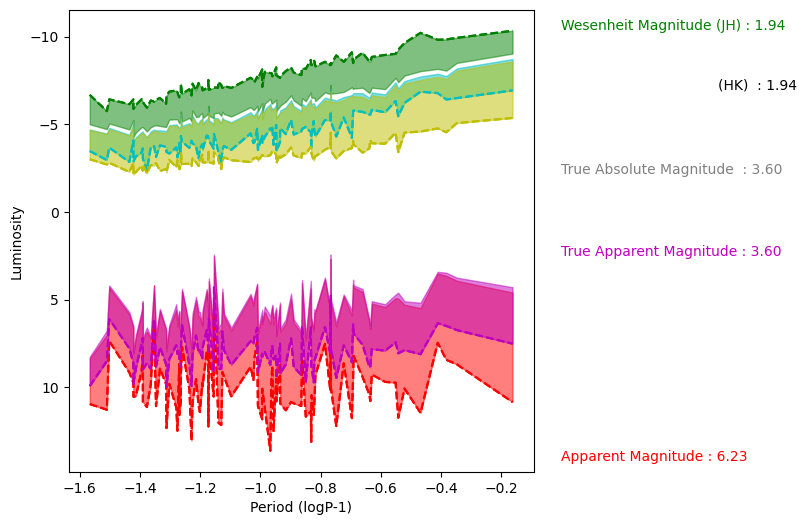

In [25]:
plottransformation()
#plt.savefig('%s%s.png'%(img_path,title))

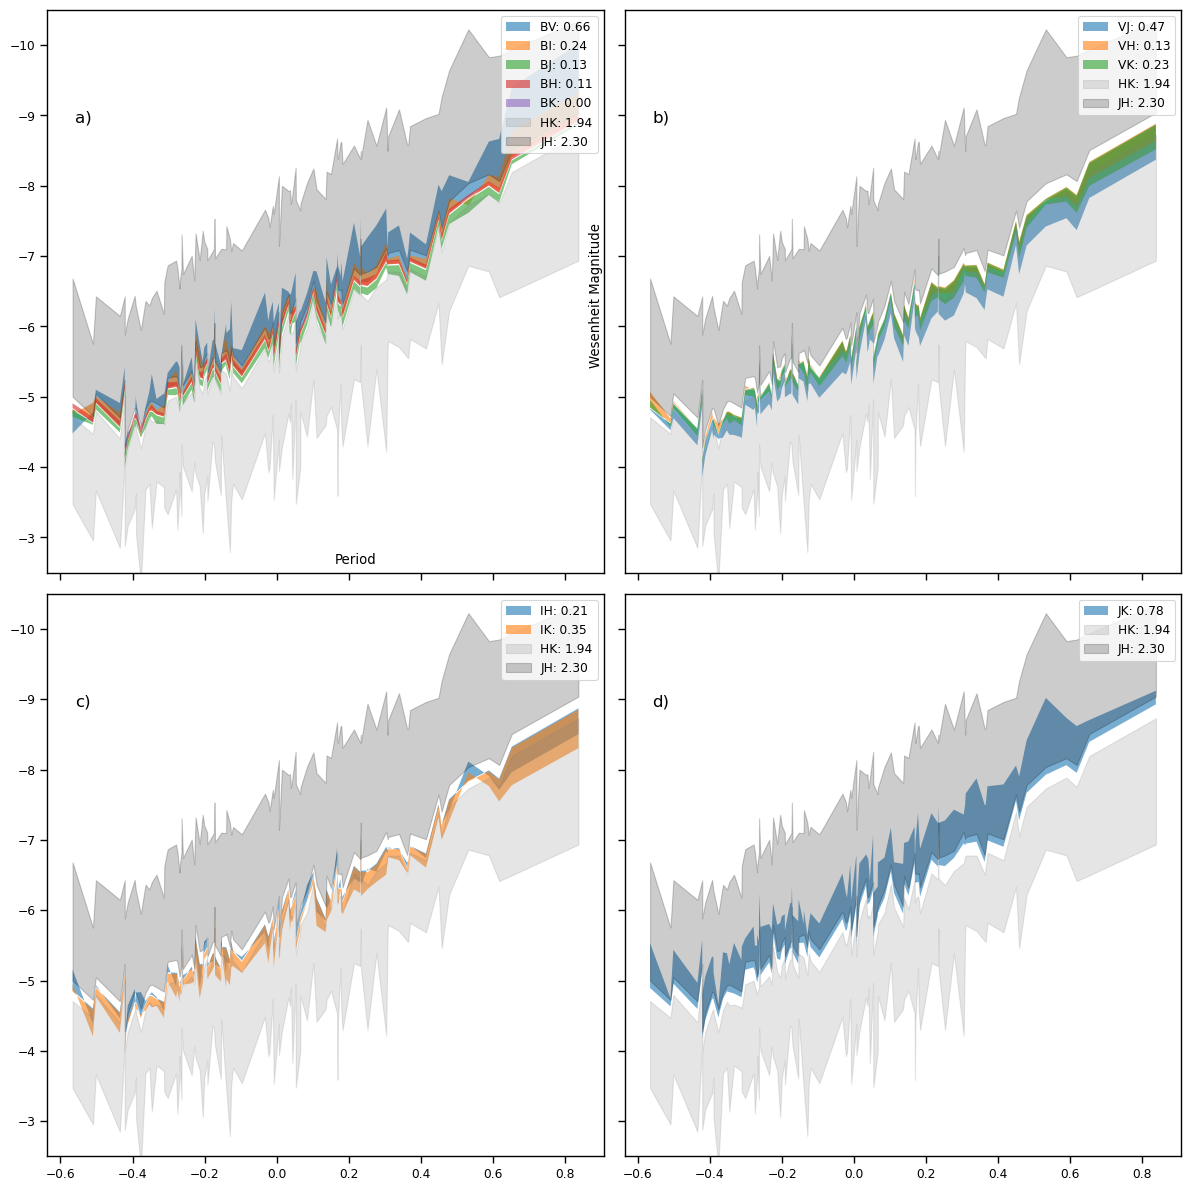

In [104]:
# Create a 2x2 subplots grid
def area(y1,y2, x = raw['logP']):
    area = f': {np.trapz(np.abs(y2 - y1), x):.2f}'
    return area
fig, axs = plt.subplots(2, 2, figsize=(12, 12), sharex=True, sharey=True)

# Define the common title

x = [color_index[0:5], color_index[6:9], color_index[10:12], color_index[13:14]]
#x = [color_index[0:5], color_index[5:9], color_index[9:12], color_index[13:14]]
z=0
d = 0
dc = ['a)', 'b)', 'c)', 'd)']
# Loop through each subplot
for ax in axs.flat:
    for i in x[z]:
        y1 = w[mag[0]+i+disg]
        y2 = w[mag[5]+i+disg]
        ax.fill_between(raw['logP'], y1, w[mag[5]+i+disg], alpha=.6,  label = i+area(y1,y2))
    ax.fill_between(raw['logP'], w[mag[0]+'HK'+disg], w[mag[5]+'HK'+disg], alpha=.2,  label = 'HK'+area(w[mag[0]+'HK'+disg],w[mag[5]+'HK'+disg]), color='grey')
    ax.fill_between(raw['logP'], w[mag[0]+'JH'+disg], w[mag[5]+'JH'+disg], alpha=.2,  label = 'JH'+area(w[mag[0]+'JH'+disg],w[mag[5]+'JH'+disg]), color='black')
    z=z+1
    ax.set_ylim(-10.5,-2.5)
    ax.legend()
    ax.invert_yaxis()
    ax.annotate(dc[d], (0.05, 0.8), xycoords='axes fraction', ha='left', fontsize=12, color='black')
    d=d+1
# Layout so plots do not overlap
fig.text(0.3, 0.53, 'Period', ha='center', va='center')  # x-axis label
fig.text(0.5, 0.75, 'Wesenheit Magnitude', ha='center', va='center', rotation='vertical')  # y-axis label

fig.tight_layout()

title='wesenheit_comparison'
# Save the figure
save(title)
plt.show()

In [102]:
def plot_corr_reg(df, X, title, annotate_indices, s=0, f=10):
    sns.set_context("paper", rc={"axes.labelsize": f})
    df_clean = df#.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
    y_vars = df.columns[1:]#.difference(X)  # Use all other columns as y_vars
    g = sns.pairplot(data=df, x_vars=X, y_vars=y_vars, kind='scatter')

    for i, ax in enumerate(g.axes.flatten()):  
        if i < len(y_vars):  # Avoid index errors if axes are more than y_vars
            y_var = y_vars[i]
            x_vals = df[X]
            y_vals = df[y_var]
            
            # Calculate the linear regression parameters
            slope, intercept, r_value, p_value, std_err = stats.linregress(x_vals, y_vals)
            equation = f'{y_var[0:3]} = {slope:.2f}logP + {intercept:.2f}'
            # Annotate the regression equation
            ax.annotate(equation, (0.05, 0.9), xycoords='axes fraction', ha='left', fontsize=8, color='black')
            r = f'   R-value: {round(r_value, 5)}'
            ax.annotate(r, (0.05, 0.8), xycoords='axes fraction', ha='left', fontsize=8, color='black')

        if annotate_indices:
            for idx in annotate_indices:
                if idx in df.index:
                    ax.annotate(str(idx), 
                                (df.loc[idx, X], df.loc[idx, y_var]),
                                textcoords="offset points", xytext=(-5, -5), ha='right', fontsize=8)
        ax.set_ylim(ax.get_ylim()[::-1])
        ax.set_xlabel('', fontsize=10)
        ax.set_ylabel('', fontsize=10)
        if i ==0:
            ax.text(0.4, 1.02, title[4:], ha='center', va='bottom', rotation='horizontal', transform=ax.transAxes)
    
    if s == 1:
        save(title)  # Assuming 'save()' function is defined elsewhere
    plt.tight_layout()


/home/shubham/.config/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_199571/3174584311.py:35: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


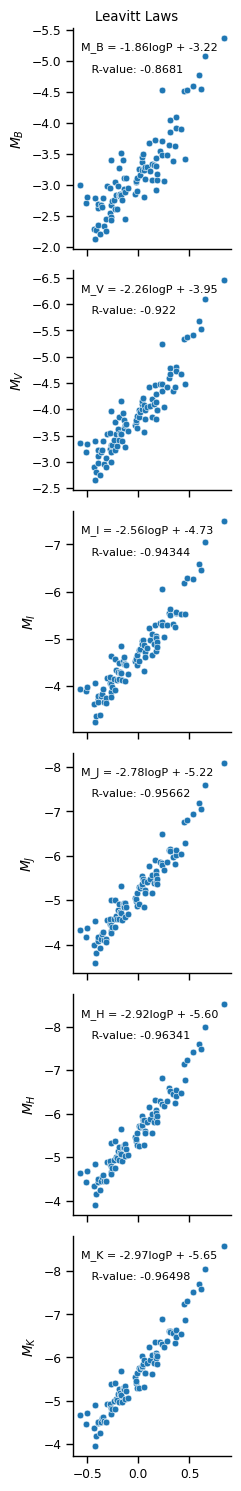

In [87]:
title = 'abs'
marks = []
plot_corr_reg(data.drop(['name', 'EBV', 'plx'], axis=1), 'logP', title , annotate_indices=marks, s=1, f=18)

In [90]:
df

,name,logP,BBV_g,VBV_g,IBV_g,JBV_g,HBV_g,KBV_g
0,V0465Mon,-0.566486,-4.477676,-4.477676,-4.625818,-4.660341,-4.847009,-4.799409
1,EVSct,-0.509902,-4.778034,-4.778034,-4.849898,-4.640718,-4.723376,-4.637176
2,SZTau,-0.501834,-5.098277,-5.098277,-5.046348,-4.881109,-4.993693,-4.925893
3,SSSct,-0.435186,-4.910835,-4.910835,-4.836339,-4.585010,-4.689923,-4.592523
4,QZNor,-0.421756,-5.417812,-5.417812,-5.300186,-5.125018,-5.210415,-5.147015
...,...,...,...,...,...,...,...,...
90,KNCen,0.531857,-8.053496,-8.053496,-7.875096,-7.710896,-7.894696,-7.838296
91,UCar,0.588970,-8.627534,-8.627534,-8.374199,-8.038418,-8.139976,-8.052576
92,RSPup,0.617420,-8.664228,-8.664228,-8.374441,-7.963725,-8.063976,-7.957576
93,SVVul,0.652569,-9.399272,-9.399272,-9.061936,-8.548156,-8.593714,-8.456314


In [1]:
cols = ['BV', 'BI', 'BK', 'VI', 'VK', 'IJ', 'IH', 'JK', 'HK'] 
for col in cols:
    ind = ['name',"logP"] + [x+col+'_g' for x in mag]
    df = w[ind]
# remove incomplete rows and sort stars by period.  
#df = df.sort_values(by = ['logP'],ascending=True).dropna().reset_index(drop = True)
    plot_corr_reg(df.drop('name', axis=1), 'logP', title = f'wes_'+col, annotate_indices=[], s=1, f=18)

NameError: name 'mag' is not defined

In [168]:
s=1
PL_mg = []
PL_cg = []
err_mg = []
err_cg = []
PL_mi = []
PL_ci = []
err_mi = []
err_ci = []
PL_name=[]
dig_g = ''
residue = pd.DataFrame()
prediction = pd.DataFrame()
prediction['name'] =  residue['name'] = df_a0['ID']
prediction['logP'] = residue['logP'] = df_a0['logP']
for i in range(0,6):
    ag,bg,cg,dg,eg,fg = regression(df_a0['logP'], df_a0[bands[i]], '(logP -1)', bands[i]+disg, 1)
    residue['r_'+mag[i]+disg] = dg
    prediction['p_'+mag[i]+disg] = cg
    PL_name.append(mag[i])
    PL_mg.append(ag)
    PL_cg.append(bg)
    err_mg.append(eg)
    err_cg.append(fg)


#for color in color_index:
cols=['VI', 'VK', 'IH', 'JK']
for color in cols:
    for i in range(0,6):
        ag,bg,cg,dg,eg,fg = regression(w['logP'], w[mag[i]+color+disg], '(logP -1)', mag[i]+color+disg,1)              
        residue['r_'+mag[i]+color+disg] = dg
        prediction['p_'+mag[i]+color+disg] = cg 
        PL_mg.append(ag)
        PL_cg.append(bg)
        err_mg.append(eg)
        err_cg.append(fg)
        PL_name.append(mag[i]+color)
PLW = pd.DataFrame(
    {'name': PL_name,
     'mg': PL_mg,
     'cg': PL_cg,
     'err_mg': err_mg,
     'err_cg': err_cg,
    })

if s == 1:
    residue.to_csv('%s%i_residue.csv'%(data_path,cepheid))
    prediction.to_csv('%s%i_prediction.csv'%(data_path,cepheid))
    #PLW = PLW.set_index('name').T
    PLW.to_csv('./%s%i_PLW_slope_intercept.csv'%(data_path,cepheid))

M_B_g = -1.855271 (logP -1) ( 0.110007) + -3.220733 ( 0.032814)
M_V_g = -2.259362 (logP -1) ( 0.098389) + -3.951376 ( 0.029348)
M_I_g = -2.562737 (logP -1) ( 0.093391) + -4.734505 ( 0.027858)
M_J_g = -2.784101 (logP -1) ( 0.087924) + -5.217552 ( 0.026227)
M_H_g = -2.917487 (logP -1) ( 0.084162) + -5.598022 ( 0.025104)
M_K_g = -2.970787 (logP -1) ( 0.083741) + -5.652904 ( 0.024979)
BVI_g = -2.869100 (logP -1) ( 0.100746) + -5.837821 ( 0.030051)
VVI_g = -3.033277 (logP -1) ( 0.096060) + -5.949153 ( 0.028654)
IVI_g = -3.033277 (logP -1) ( 0.096060) + -5.949153 ( 0.028654)
JVI_g = -3.010084 (logP -1) ( 0.088450) + -5.800903 ( 0.026384)
HVI_g = -3.057566 (logP -1) ( 0.084870) + -5.959620 ( 0.025316)
KVI_g = -3.062883 (logP -1) ( 0.084150) + -5.890639 ( 0.025101)
BVK_g = -2.913122 (logP -1) ( 0.085255) + -5.750814 ( 0.025431)
VVK_g = -3.066882 (logP -1) ( 0.083373) + -5.882736 ( 0.024869)
IVK_g = -3.053709 (logP -1) ( 0.086738) + -5.908771 ( 0.025873)
JVK_g = -3.019897 (logP -1) ( 0.085857) 

In [115]:
b=24
m = [round(PL_mg[0+b:6+b][x], 7) for x in range(0,6)]
c = [round(PL_cg[0+b:6+b][x], 7) for x in range(0,6)]
me = [round(err_mg[0+b:6+b][x], 7) for x in range(0,6)]
ce = [round(err_cg[0+b:6+b][x], 7) for x in range(0,6)]
for i in range(0,6):
    print(f'\t{mag[i]},JK & {m[i]} & {c[i]} & {me[i]} & {ce[i]}\\\ ')

	B,JK & -3.2689047 & -6.517326 & 0.0888607 & 0.0265062\\ 
	V,JK & -3.3384717 & -6.4678593 & 0.0817335 & 0.0243802\\ 
	I,JK & -3.2188354 & -6.2645265 & 0.0813336 & 0.0242609\\ 
	J,JK & -3.0992013 & -5.9523654 & 0.0820109 & 0.024463\\ 
	H,JK & -3.1128063 & -6.0535056 & 0.0811639 & 0.0242103\\ 
	K,JK & -3.0992013 & -5.9523654 & 0.0820109 & 0.024463\\ 


In [169]:
PLW.mg[0:6]

0   -1.855271
1   -2.259362
2   -2.562737
3   -2.784101
4   -2.917487
5   -2.970787
Name: mg, dtype: float64

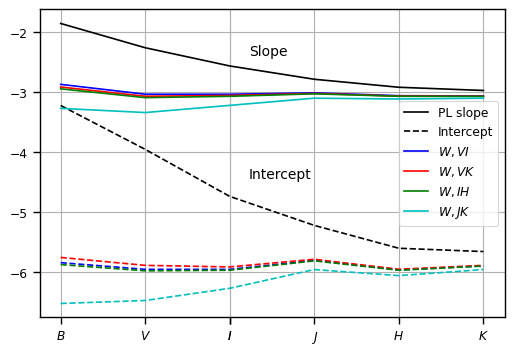

In [178]:
plt.figure(figsize=(6,4))
plt.plot([j for j in range(0,6)],PLW.mg[0:6], 'k-', label = '%s'%('PL slope'))
plt.plot([j for j in range(0,6)],PLW.cg[0:6], 'k--', label = '%s'%('Intercept'))
for x in range(1,5):
    plt.plot([j for j in range(0,6)],PLW.mg[6*x:6+6*x], col_lin[x-1], label = '$W,{%s}$'%(cols[x-1]))
    plt.plot([j for j in range(0,6)],PLW.cg[6*x:6+6*x], col_das[x-1])

plt.annotate('Slope', (0.45, 0.85), xycoords='axes fraction', ha='left', fontsize=10, color='black' )
plt.annotate('Intercept', (0.45, 0.45), xycoords='axes fraction', ha='left', fontsize=10, color='black')
plt.legend()
ticks = ['$B$', '$V$', 'R', '$I$', '$J$', '$H$', '$K$']
plt.xticks([0,1,2,2,3,4,5],ticks)
plt.grid()
title='PLW_mc'
# Save the figure
save(title)
plt.show()